In [27]:
%pip install seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
df = pd.read_csv(r"C:\Users\HP\Downloads\breastcancer.csv")
df.head(100)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,60,White,Married,T2,N1,IIB,Well differentiated,1,Regional,25,Positive,Positive,17,2,50,Alive
96,50,White,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Negative,4,2,25,Dead
97,61,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,25,Positive,Positive,10,1,73,Alive
98,50,White,Married,T4,N1,IIIB,Poorly differentiated,3,Regional,24,Positive,Positive,3,3,63,Dead


In [29]:
print("df.isnull().sum()")

df.isnull().sum()


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [31]:
column_names = df.columns
print(column_names)

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')


Data Visualization and Preprocessing

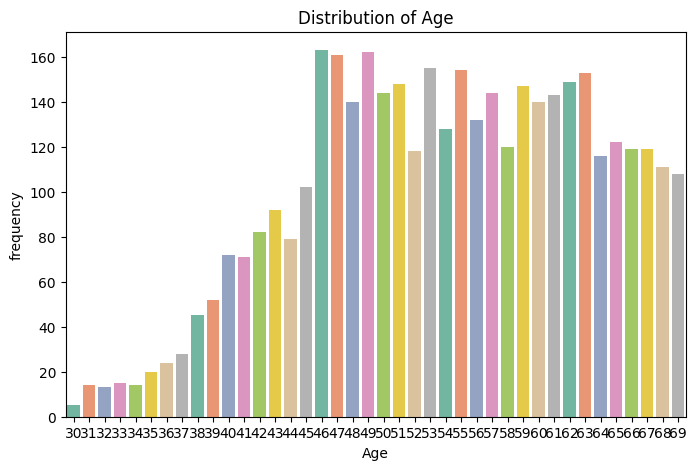

In [32]:
column_name = 'Age'
plt.figure(figsize=(8,5))
sns.countplot(data=df, x=column_name,palette='Set2')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel("frequency")
plt.show()


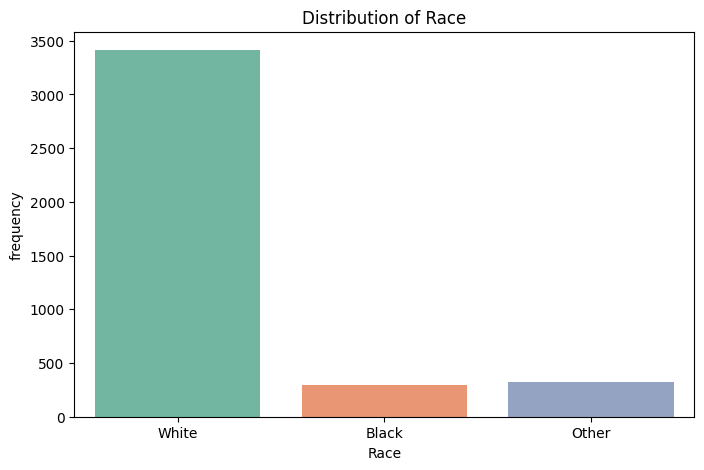

In [33]:
column_name = 'Race'
plt.figure(figsize=(8,5))
sns.countplot(data=df, x=column_name,palette='Set2')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel("frequency")
plt.show()


In [34]:
le = LabelEncoder()
df['Race_encoded'] = le.fit_transform(df['Race'])
LabelMapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(LabelMapping)

{'Black': 0, 'Other': 1, 'White': 2}


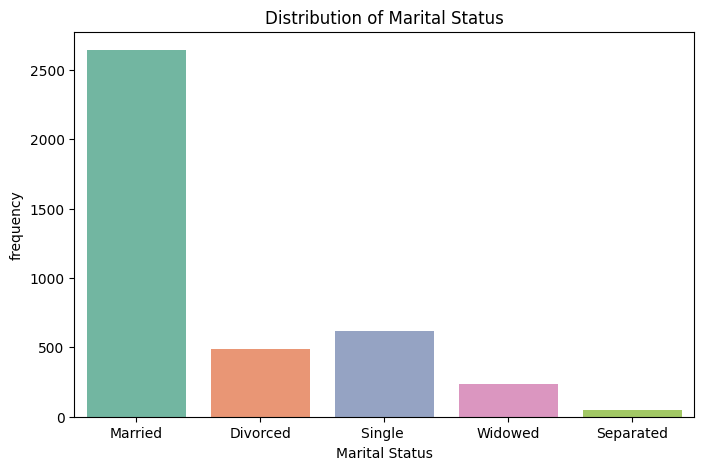

In [35]:
column_name = 'Marital Status'
plt.figure(figsize=(8,5))
sns.countplot(data=df, x=column_name,palette='Set2')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel("frequency")
plt.show()


T Stage 
T2    1786
T1    1603
T3     533
T4     102
Name: count, dtype: int64


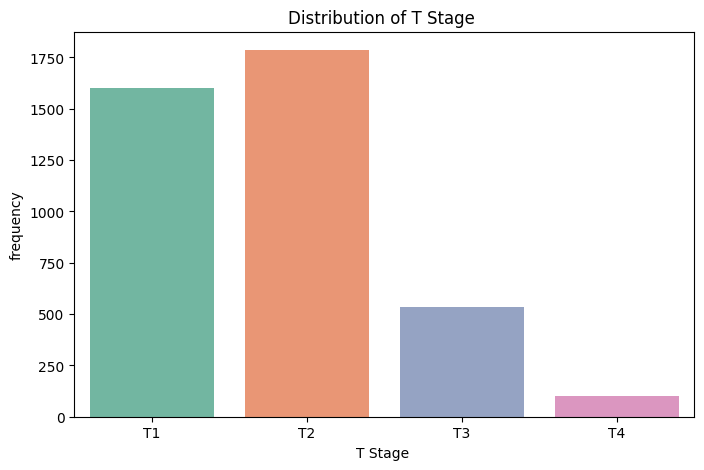

In [36]:
column_name = 'T Stage '
print(df[column_name].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(data=df, x=column_name, palette='Set2')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel("frequency")
plt.show()

Progesterone Status
Positive    3326
Negative     698
Name: count, dtype: int64


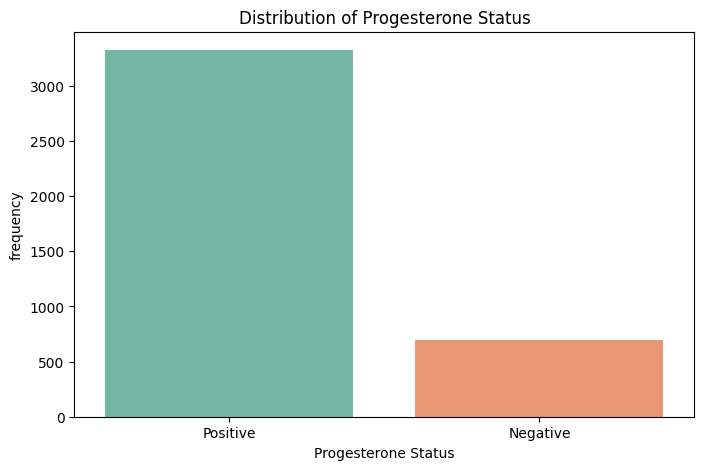

In [37]:
column_name = 'Progesterone Status'
print(df[column_name].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(data=df, x=column_name, palette='Set2')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel("frequency")
plt.show()

Survival Months
69     81
63     73
56     73
102    73
98     72
       ..
7       5
3       4
11      4
2       3
1       1
Name: count, Length: 107, dtype: int64


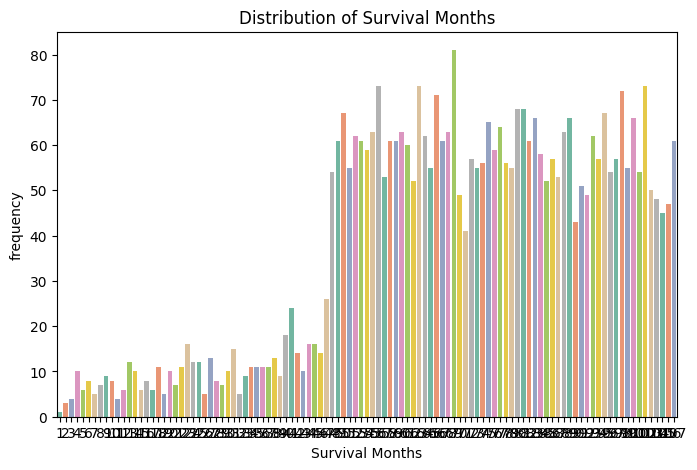

In [38]:
column_name = 'Survival Months'
print(df[column_name].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(data=df, x=column_name, palette='Set2')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel("frequency")
plt.show()

Status
Alive    3408
Dead      616
Name: count, dtype: int64


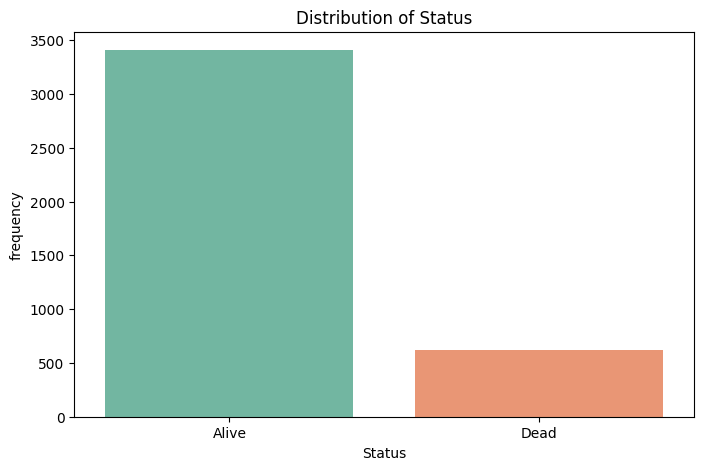

In [39]:
column_name = 'Status'
print(df[column_name].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(data=df, x=column_name, palette='Set2')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel("frequency")
plt.show()

In [40]:
df = df.select_dtypes(exclude=['object'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4024 non-null   int64
 1   Tumor Size              4024 non-null   int64
 2   Regional Node Examined  4024 non-null   int64
 3   Reginol Node Positive   4024 non-null   int64
 4   Survival Months         4024 non-null   int64
 5   Race_encoded            4024 non-null   int32
dtypes: int32(1), int64(5)
memory usage: 173.0 KB


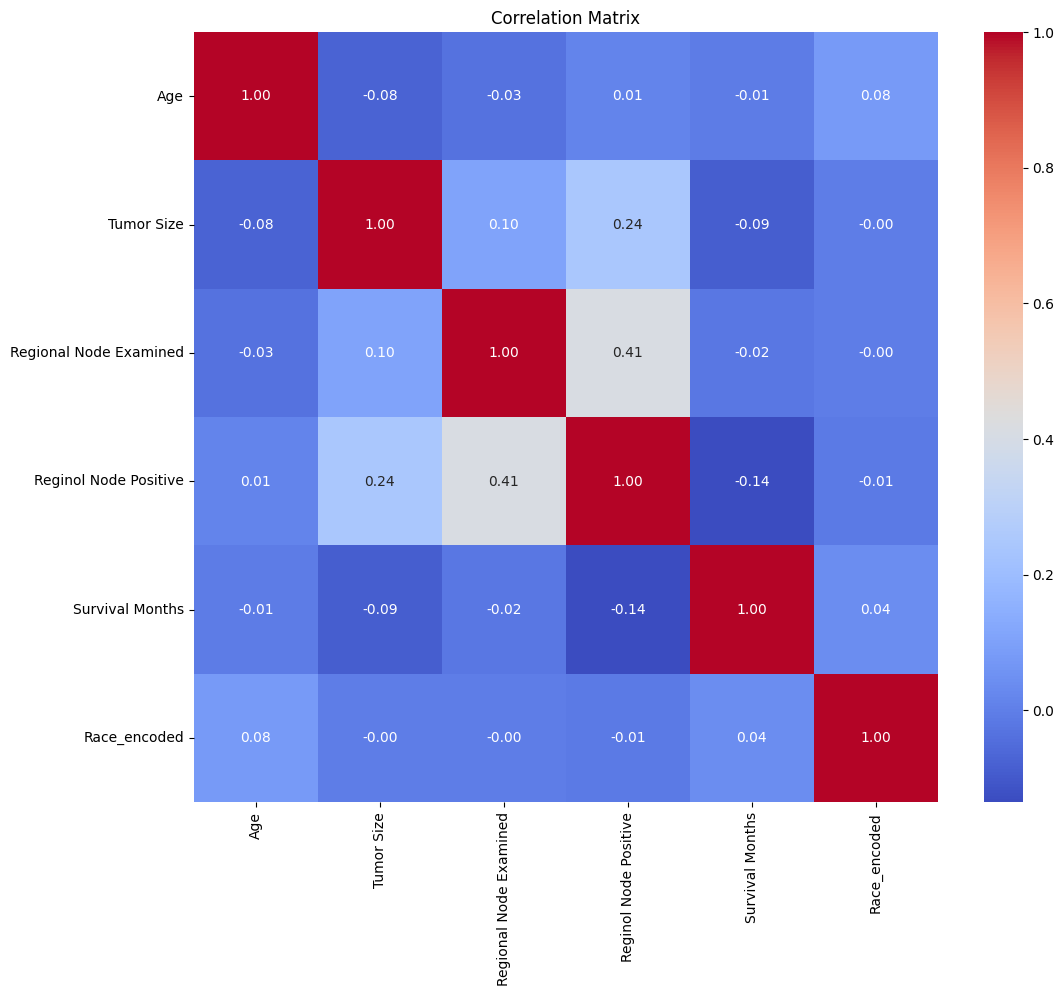

In [41]:
correlation_matrix = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


MODELS

In [44]:
params = {
    'max_depth':[3,5,10,None],
    'min_samples_leaf':[1,2,4],
    'min_samples_split':[2,5,10]
}

# Use the original dataframe to get the target variable
df_full = pd.read_csv(r"C:\Users\HP\Downloads\breastcancer.csv")
le_status = LabelEncoder()
y = le_status.fit_transform(df_full['Status'])

# Use the current df for features (after preprocessing)
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)


,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_depth': [3, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'
